In [1]:
!pip install numpy opencv-python
%matplotlib inline


In [2]:
import random
import copy
import matplotlib.pyplot as plt

def generate_centroids(k, shape):
    centroids = []
    for i in range(k):
        centroids.append((random.randint(0, shape[0]), random.randint(0, shape[1])))
    return centroids

def shift_centroids(k, previous_centroids):
    centroids = copy.deepcopy(previous_centroids)
    relations = {}
    for j in range(k):
        relations[j] = []
    for point in points:
        distances = np.array([(centroid[0]-point[0])**2 + (centroid[1]-point[1])**2 for centroid in centroids])
        relations[np.argmin(distances)].append(point)    
    for j in range(k):
        if len(relations[j]) == 0:
            centroids[j] = (0, 0)
            continue
        mean = np.mean(relations[j], axis=0, dtype=np.int32)
        centroids[j] = (mean[0], mean[1])
    return centroids, relations

def check_convergence(previous_centroids, current_centroids):
    for i in range(len(previous_centroids)):
        if previous_centroids[i][0] != current_centroids[i][0] or previous_centroids[i][1] != current_centroids[i][1]:
            return False
    return True

def mean_distance(centroids, relations):
    total_distance = 0
    points = 0
    for i in range(len(centroids)):
        for point in relations[i]:
            points += 1
            total_distance += (centroids[i][0]-point[0])**2 + (centroids[i][1]-point[1])**2
    return total_distance/points

def k_means(K, iterations):
    variance = []
    data = []
    for idx in range(iterations):
        previous_centroids = generate_centroids(K, img_array.shape)
        current_centroids, relations = shift_centroids(K, previous_centroids)
        if current_centroids is None: continue
        while not check_convergence(previous_centroids, current_centroids):
            previous_centroids = current_centroids
            current_centroids, relations = shift_centroids(K, previous_centroids)
        data.append((current_centroids, relations))
        variance.append(mean_distance(current_centroids, relations))
    return *data[np.argmin(variance)], np.min(variance) 

def find_distance(point_1, point_2):
    return ((point_1[0] - point_2[0]) ** 2 + (point_1[1] - point_2[1]) ** 2) ** 0.5


#### Change image name

In [3]:
import numpy as np
from PIL import Image

img = Image.open('3.png') # Add image name here

img_array = np.array(img)[:,:,0]
img = np.array(img)
img_array.shape
points = []
for i in range(img_array.shape[0]):
    for j in range(img_array.shape[1]):
        if img_array[i, j] != 0:
            points.append((i, j))

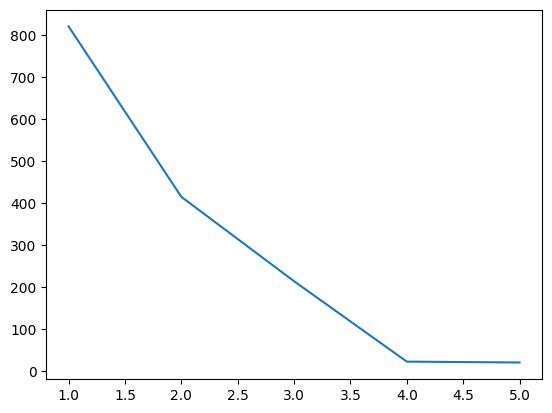

In [4]:
max_k = 6
iterations = 5
variances = []
Ks = []
centroids_per_k = []
for K in range(1, max_k):
    centroids, relations, variance = k_means(K, iterations)
    centroids_per_k.append(centroids)
    variances.append(variance)
    Ks.append(K)
plt.plot(Ks, variances)
plt.show()

#### From elbow plot, find the appropriate value of K and enter in `K_from_elbow`

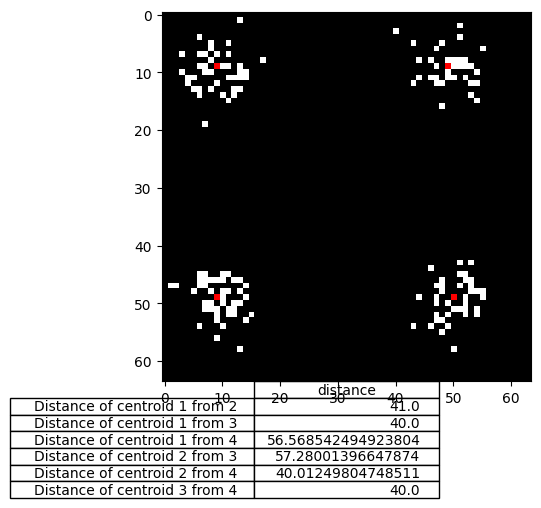

In [5]:
K_from_elbow = 4 # Change here

centroids = centroids_per_k[Ks.index(K_from_elbow)]
for centroid in centroids:
    img[centroid][0] = 255
    img[centroid][1] = 0
    img[centroid][2] = 0
    

table = []
rows = []
columns = ['distance']
for i in range(len(centroids)-1):
    for j in range(len(centroids) - i-1):
        rows.append(f'Distance of centroid {i+1} from {i+j+2}')
        table.append([find_distance(centroids[i], centroids[i+j+1])])
        
my_table = plt.table(cellText=table,
                     colWidths=[0.5] * 3,
                     rowLabels=rows,
                     colLabels=columns)
# plt.show()
plt.imshow(img)

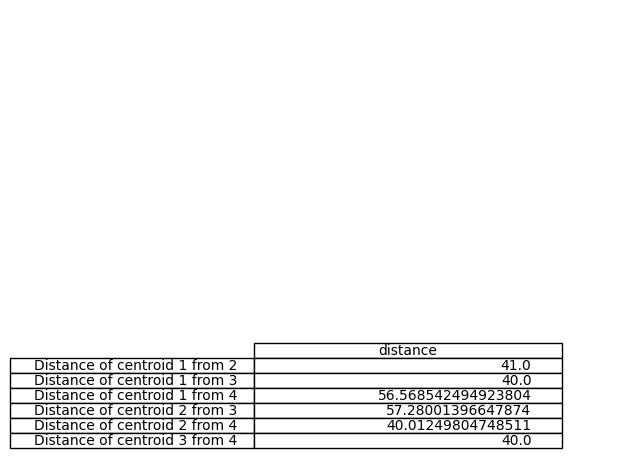

In [6]:
def find_distance(point_1, point_2):
    return ((point_1[0] - point_2[0]) ** 2 + (point_1[1] - point_2[1]) ** 2) ** 0.5

fig, ax = plt.subplots()

# hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

table = []
rows = []
columns = ['distance']
for i in range(len(centroids)-1):
    for j in range(len(centroids) - i-1):
        rows.append(f'Distance of centroid {i+1} from {i+j+2}')
        table.append([find_distance(centroids[i], centroids[i+j+1])])
        
ax.table(cellText=table,
                     colWidths=[0.7] * 3,
                     rowLabels=rows,
                     colLabels=columns)
fig.tight_layout()
plt.show()

        